In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

# Load The Dataset

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
print(train_data.shape, test_data.shape)

(42000, 785) (28000, 784)


In [4]:
train_data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
features = test_data.columns
print(features)

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


In [6]:
x_train = train_data.iloc[: , 1: ]
y_train = train_data['label']
x_test = test_data

In [7]:
print(x_train.shape, y_train.shape)
print(x_test.shape)

(42000, 784) (42000,)
(28000, 784)


# Turn Data into Numpy Array

In [8]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape, y_train.shape)
print(x_test.shape)

(42000, 784) (42000,)
(28000, 784)


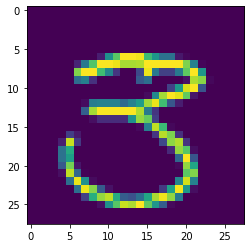

In [10]:
plt.imshow(x_train[7].reshape((28 , 28)))

# Function to turn data into image

In [11]:
def drawImg(sample):
    img = sample.reshape((28 , 28))
    plt.imshow(img)
    plt.show()

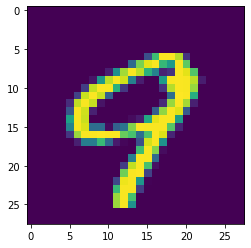

9


In [12]:
drawImg(x_train[100])
print(y_train[100])

# Using KNN for classifying data and predict digit for test data

In [13]:
def dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [14]:
def knn(x , y , query , k = 10):
    val = []
    m = x.shape[0]
    for i in range(m):
        d = dist(query , x[i])
        val.append((d , y[i]))
    val = sorted(val)
    val = val[:k]
    val = np.array(val)
    freq = np.unique(val[:, ] , return_counts=True)

    index = freq[1].argmax()
    pred = freq[0][index]
    return pred

In [15]:
def predict(x_train , y_train, x_test ):
    m = len(x_test)
    y_predict = []
    for i in range(m):
        pred = knn(x_train , y_train , x_test[i])
        y_predict.append(pred)
    return y_predict

In [16]:
def predict_m(x_train , y_train, x_test ):
    m = np.random.choice(len(x_test) , 10)

    for i in (m):
        pred = knn(x_train , y_train , x_test[i])

        drawImg(x_test[i])
        print('The Predicted output is: ' , pred)
    

In [17]:
def accuracy(x_train , y_train , x_test):
    y_predict = predict(x_train , y_train , x_train)
    return np.mean(y_predict == y_train)

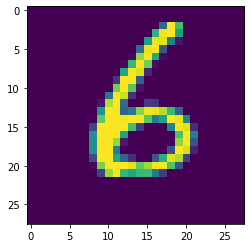

The Predicted output is:  6.0


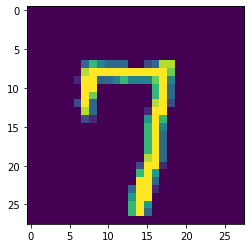

The Predicted output is:  7.0


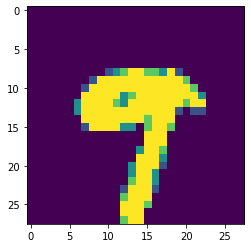

The Predicted output is:  9.0


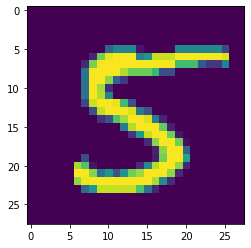

The Predicted output is:  5.0


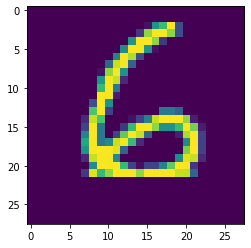

The Predicted output is:  6.0


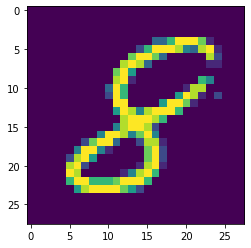

The Predicted output is:  8.0


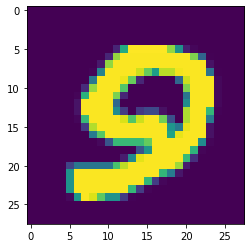

The Predicted output is:  9.0


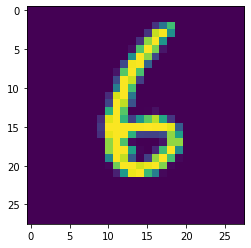

The Predicted output is:  6.0


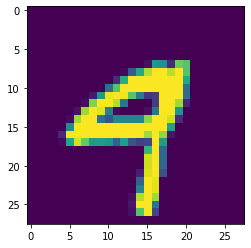

The Predicted output is:  9.0


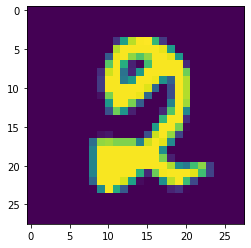

The Predicted output is:  2.0


In [18]:
predict_m(x_train, y_train , x_test)

In [ ]:
accuracy(x_train , y_train , x_test)

In [20]:
# y_predict = predict(x_train , y_train , x_test)

In [21]:
# print(y_predict)

# Using Sklearn Library

In [22]:
new_knn = KNeighborsClassifier(n_neighbors= 1)
new_knn.fit(x_train , y_train)
y_test = new_knn.predict(x_test)

In [23]:
print(y_test)

[2 0 9 ... 3 9 2]
